**Import Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/kaggle'
%cd /content/gdrive/My Drive/kaggle
!kaggle datasets download -d srolka/ecommerce-customers
!unzip \*.zip && rm *.zip

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/kaggle
  0% 0.00/43.1k [00:00<?, ?B/s]
100% 43.1k/43.1k [00:00<00:00, 5.71MB/s]
Archive:  ecommerce-customers.zip
replace Ecommerce Customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Ecommerce Customers.csv  


**Data Exploratory Analysis**

In [ ]:
data = pd.read_csv('Ecommerce Customers.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


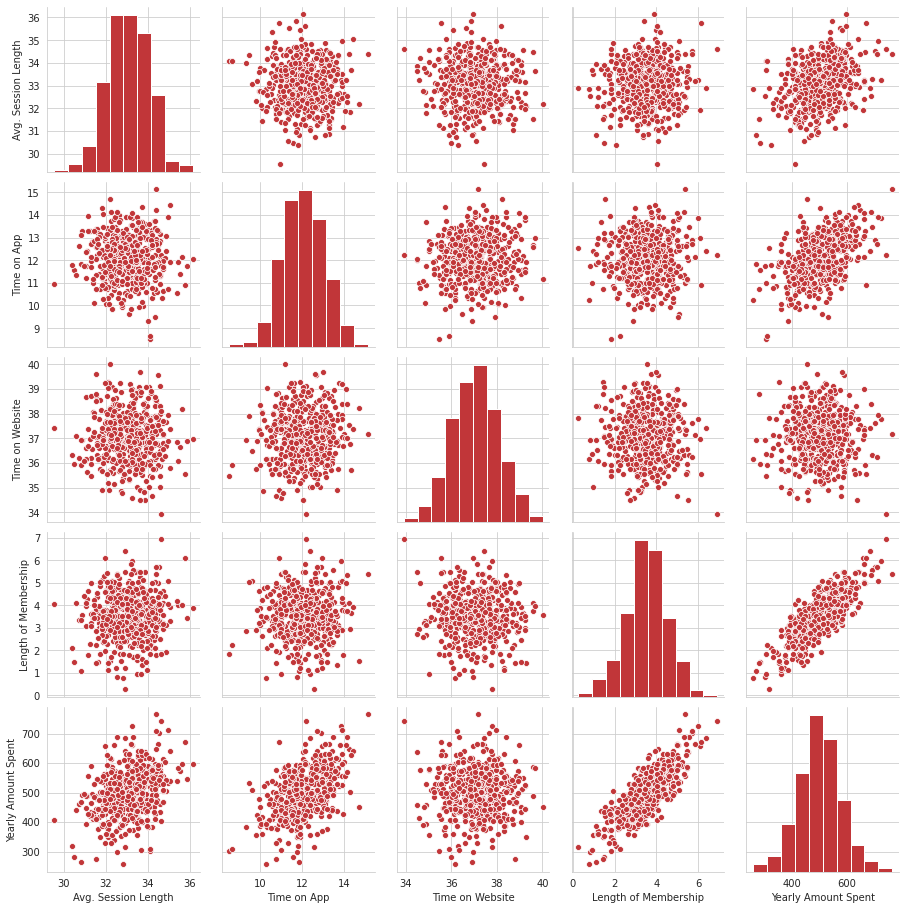

In [ ]:
sns.set_palette('RdBu')
sns.set_style('whitegrid')
sns.pairplot(data)

**Train and Predict**

In [ ]:
x = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 201)

***1. Linear Regression***

In [ ]:
linear = LinearRegression()
linear.fit(xtrain, ytrain)

In [ ]:
cdf = pd.DataFrame(data = linear.coef_, index = xtrain.columns, columns = ['Coefficients'])
n=xtrain.shape[0]
k=xtrain.shape[1]
dfN = n-k
train_pred=linear.predict(xtrain)
train_error = np.square(train_pred - ytrain)
sum_error=np.sum(train_error)
se=[0]*len(xtrain.columns)
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(xtrain[list(xtrain.columns)[i]]-xtrain[list(xtrain.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Avg. Session Length,25.697476,0.538446,47.725287
Time on App,38.763129,0.539874,71.800324
Time on Website,0.214565,0.524973,0.408717
Length of Membership,61.602004,0.541435,113.775509


In [ ]:
print("R-squared value of this fit:",round(metrics.r2_score(ytrain,train_pred),3))

R-squared value of this fit: 0.984


Text(0, 0.5, 'predicted values')

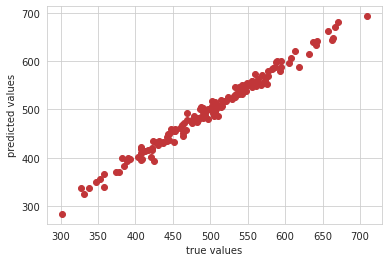

In [ ]:
prediction = linear.predict(xtest)
plt.scatter(ytest, prediction)
plt.xlabel('true values')
plt.ylabel('predicted values')

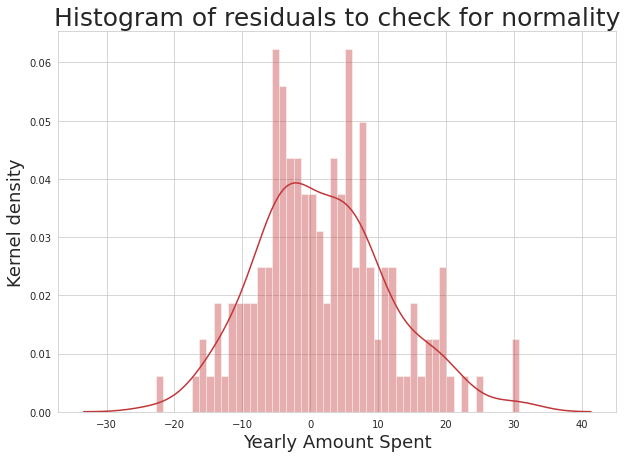

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot((ytest - prediction), bins=50)

In [ ]:
print("R-squared value of this fit:",round(metrics.r2_score(ytest,prediction),3))

R-squared value of this fit: 0.984


In [ ]:
from sklearn import metrics
mse = metrics.mean_squared_error(ytest, prediction)
mae = metrics.mean_absolute_error(ytest, prediction)
rmse = np.sqrt(metrics.mean_squared_error(ytest, prediction))
print(mse, mae, rmse)

97.61288638137759 7.777557458484192 9.879923399570343


***2. Lasso Regression***

In [ ]:
npoints= 40
xmin = 1
xmax = 20
noise_mean = 0
noise_sd = 2
deg_min = 2
deg_max = 8

x_smooth = np.array(np.linspace(xmin,xmax,1001))
x = np.array(np.linspace(1,10, npoints))
x_sample = xmin + np.random.rand(npoints)*(10-1)

In [ ]:
def func(x):
    result = x**2*np.sin(x)*np.exp(-(1/xmax)*x)
    return (result)

In [ ]:
noise_x = np.random.normal(loc=noise_mean,scale=noise_sd,size=npoints)

In [ ]:
y = func(x) + noise_x
y_sample = func(x_sample) + noise_x 

In [ ]:
df = pd.DataFrame(data=x, columns=['X'])
df['Ideal y']=df['X'].apply(func)
df['y']=y
df['X_sampled']=x_sample
df['y_sampled']=y_sample
df.head()

,X,Ideal y,y,X_sampled,y_sampled
0,1.000000,0.800432,0.389038,3.744259,-7.001425
1,1.230769,1.342833,-2.693125,8.220173,37.792269
2,1.461538,1.973723,2.721191,5.973329,-7.323240
3,1.692308,2.612141,0.049522,6.538966,5.238358
4,1.923077,3.152894,6.624600,4.881325,-14.929738


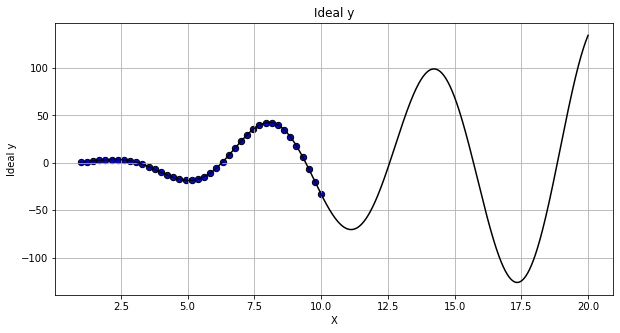

In [ ]:
df.plot.scatter('X', 'Ideal y', grid = True, title = 'Ideal y', c ='b', s = 40, edgecolors = (0,0,0), figsize = (10,5))
plt.plot(x_smooth, func(x_smooth), 'k')

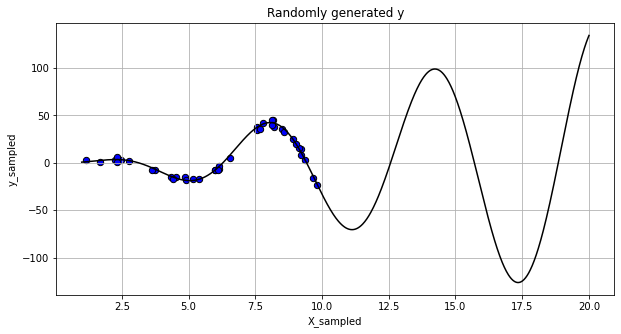

In [ ]:
df.plot.scatter('X_sampled', 'y_sampled', grid = True, title = 'Randomly generated y', c ='b', s = 40, edgecolors = (0,0,0), figsize = (10,5))
plt.plot(x_smooth, func(x_smooth), 'k')

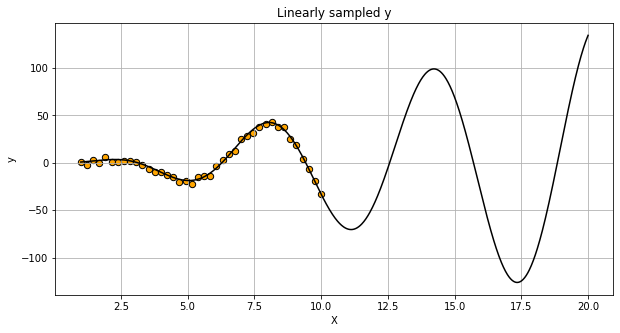

In [ ]:
df.plot.scatter('X',y='y',title='Linearly sampled y',grid=True,edgecolors=(0,0,0),c='orange',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

# Import packages for training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Linearly separated samples

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df['X'], df['y'], test_size = 0.3)
xtrain = xtrain.values.reshape(-1,1)
xtest = xtest.values.reshape(-1,1)

Test score with degree 2 : 0.0094235657874292

Test score with degree 3 : 0.42117843242152186

Test score with degree 4 : 0.6533989604414969

Test score with degree 5 : 0.7702749194313144



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3259985345603127, tolerance: 0.7391143190735834
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.47027499976775, tolerance: 0.7391143190735834
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.88446547470903, tolerance: 0.7391143190735834
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to i

Test score with degree 6 : 0.8293259942778808

Test score with degree 7 : 0.824842291204485



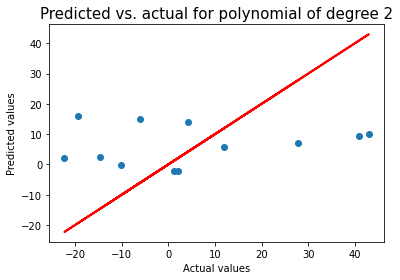

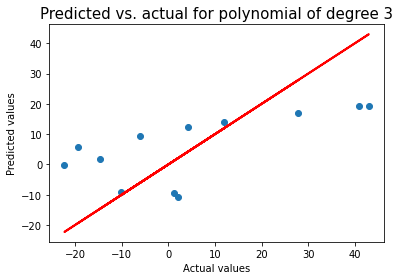

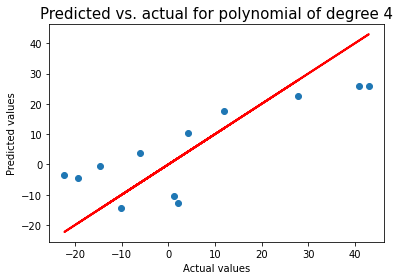

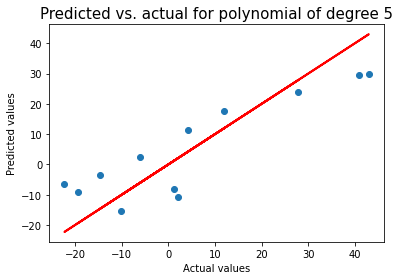

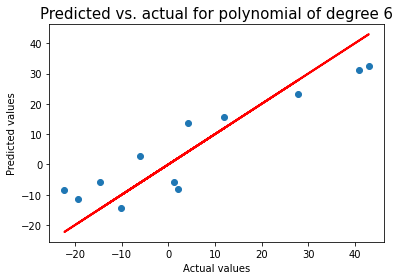

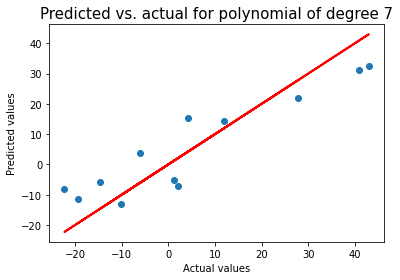

In [ ]:
l_eps = 0.001
l_itr = 1000
l_alpha = 20
poly_degree =[]
linear_score = []
for d in range(deg_min, deg_max):
  model = make_pipeline(PolynomialFeatures(d), LassoCV(eps = l_eps, n_alphas = l_alpha, max_iter = l_itr, normalize = True, cv = 5))
  model.fit(xtrain, ytrain)
  ypred = np.array(model.predict(xtest))
  rmse = np.sqrt(np.sum(np.square(ypred - ytest)))
  testscore = model.score(xtest, ytest)
  linear_score.append(testscore)
  poly_degree.append(d)
  print("Test score with degree {} : {}\n".format(d, testscore))

  plt.figure()
  plt.title("Predicted vs. actual for polynomial of degree {}".format(d),fontsize=15)
  plt.xlabel("Actual values")
  plt.ylabel("Predicted values")
  plt.scatter(ytest,ypred)
  plt.plot(ytest,ytest,'r',lw=2)

In [ ]:
linear_score

[0.0094235657874292,
 0.42117843242152186,
 0.6533989604414969,
 0.7702749194313144,
 0.8293259942778808,
 0.824842291204485]

# Randomly separated values

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df['X_sampled'], df['y_sampled'], test_size = 0.3)
xtrain = xtrain.values.reshape(-1,1)
xtest = xtest.values.reshape(-1,1)

Test score with degree 2 : -0.04077666261369295

Test score with degree 3 : 0.3713755308608739

Test score with degree 4 : -0.018072224607769583

Test score with degree 5 : 0.0037117386488086934



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6245886252991113, tolerance: 0.9844525422362848
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211.76067910703387, tolerance: 0.9844525422362848
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381.8161480120789, tolerance: 0.9844525422362848
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to i

Test score with degree 6 : 0.407457075674403

Test score with degree 7 : 0.7021977183674883



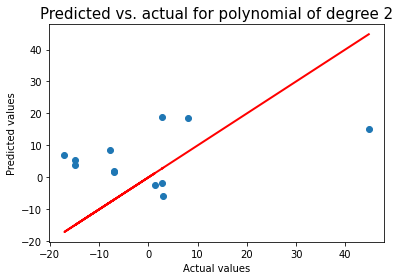

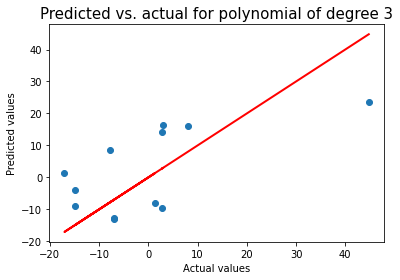

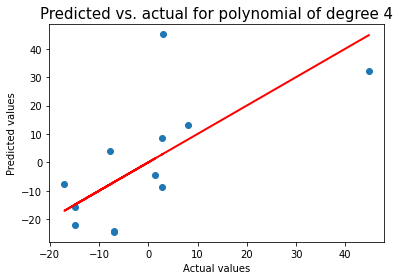

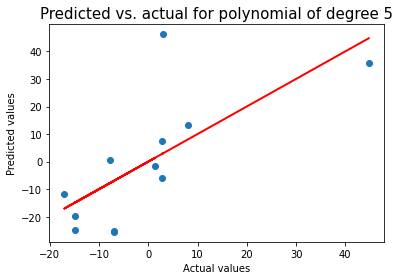

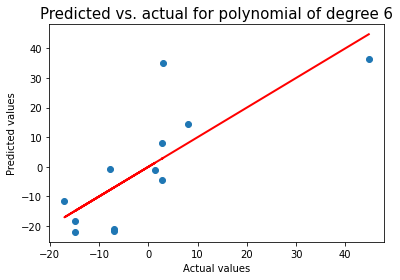

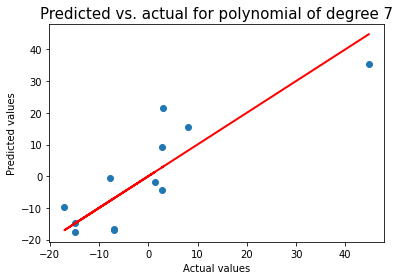

In [ ]:
poly_degree =[]
random_score = []
for d in range(deg_min, deg_max):
  model = make_pipeline(PolynomialFeatures(d), LassoCV(eps = l_eps, n_alphas = l_alpha, max_iter = l_itr, normalize = True, cv = 5))
  model.fit(xtrain, ytrain)
  ypred = np.array(model.predict(xtest))
  rmse = np.sqrt(np.sum(np.square(ypred - ytest)))
  testscore = model.score(xtest, ytest)
  random_score.append(testscore)
  poly_degree.append(d)
  print("Test score with degree {} : {}\n".format(d, testscore))

  plt.figure()
  plt.title("Predicted vs. actual for polynomial of degree {}".format(d),fontsize=15)
  plt.xlabel("Actual values")
  plt.ylabel("Predicted values")
  plt.scatter(ytest,ypred)
  plt.plot(ytest,ytest,'r',lw=2)

In [ ]:
random_score

[-0.04077666261369295,
 0.3713755308608739,
 -0.018072224607769583,
 0.0037117386488086934,
 0.407457075674403,
 0.7021977183674883]

In [ ]:
score_df = pd.DataFrame(data = {'degree':[d for d in range(deg_min, deg_max)],
                                'Linear_score': linear_score,
                                'Random_score': random_score})
score_df

,degree,Linear_score,Random_score
0,2,0.009424,-0.040777
1,3,0.421178,0.371376
2,4,0.653399,-0.018072
3,5,0.770275,0.003712
4,6,0.829326,0.407457
5,7,0.824842,0.702198


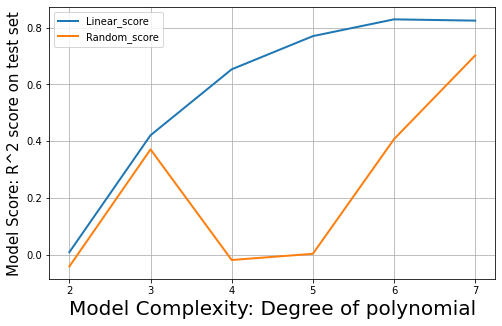

In [ ]:
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(score_df['degree'],score_df['Linear_score'],lw=2, label = 'Linear_score')
plt.plot(score_df['degree'],score_df['Random_score'],lw=2, label = 'Random_score')
plt.xlabel ("Model Complexity: Degree of polynomial",fontsize=20)
plt.ylabel ("Model Score: R^2 score on test set",fontsize=15)
plt.legend(fontsize=10)

Regularization strength from model pipeline

In [ ]:
model.steps[1][1].alpha_

0.02210099049009305